In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.shape   # Rows and columns
df.info()  # Column types and non-null counts
df.describe()  # Numeric summary
df.columns  # List of column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5433 non-null   object 
 1   rest_name         5433 non-null   object 
 2   rest_type         4336 non-null   object 
 3   loc               5433 non-null   object 
 4   dine_rating       4829 non-null   float64
 5   dine_reviews      4829 non-null   object 
 6   delivery_rating   2539 non-null   float64
 7   delivery_reviews  2539 non-null   object 
 8   cuisine           5433 non-null   object 
 9   cost              5433 non-null   object 
 10  liked             2603 non-null   object 
dtypes: float64(2), object(9)
memory usage: 467.0+ KB


Index(['link', 'rest_name', 'rest_type', 'loc', 'dine_rating', 'dine_reviews',
       'delivery_rating', 'delivery_reviews', 'cuisine', 'cost', 'liked'],
      dtype='object')

In [9]:
df=pd.read_csv("/content/zomato_outlet_final.csv.zip")
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


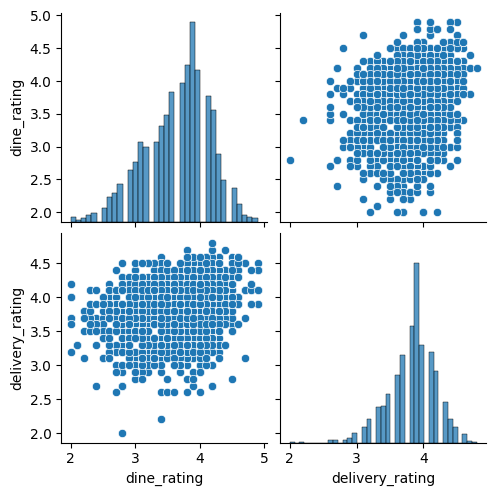

In [10]:
sns.pairplot(df)

In [20]:
drop_cols = ['url', 'address', 'phone', 'dish_liked', 'menu_item', 'reviews_list']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


In [37]:
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'rate': 'rating',
    'listed_in(type)': 'type',
    'listed_in(city)': 'city',
    'online_order': 'online_order' # Ensure the column is named online_order
}, inplace=True)

In [38]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Clean cost
df['cost'] = df['cost'].astype(str).str.replace(',', '').str.replace('Rs. ', '').str.strip()
df = df[df['cost'] != 'nan']
df['cost'] = df['cost'].astype(float)

In [39]:
df['dine_rating'] = df['dine_rating'].astype(str).str.split('/').str[0]
df = df[df['dine_rating'].isin(['NEW', '-', 'nan']) == False]
df['dine_rating'] = df['dine_rating'].astype(float)

df['delivery_rating'] = df['delivery_rating'].astype(str).str.split('/').str[0]
df = df[df['delivery_rating'].isin(['NEW', '-', 'nan']) == False]
df['delivery_rating'] = df['delivery_rating'].astype(float)

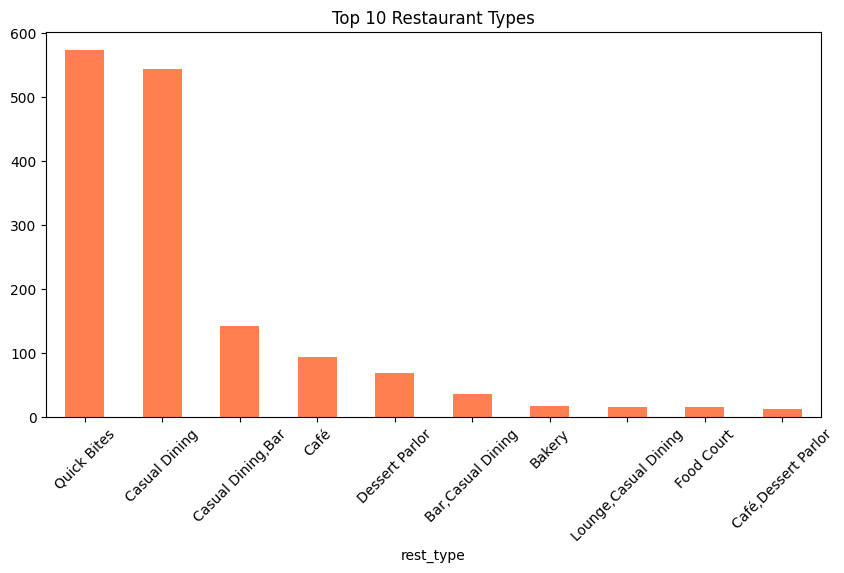

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['rest_type'].value_counts()[:10].plot(kind='bar', color='coral')
plt.title('Top 10 Restaurant Types')
plt.xticks(rotation=45)
plt.show()

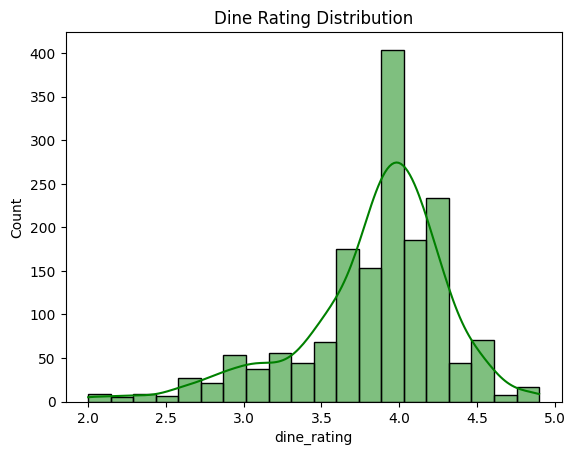

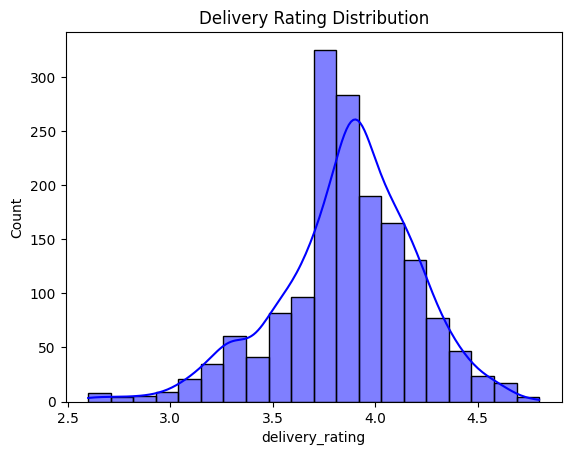

In [41]:
sns.histplot(df['dine_rating'], bins=20, kde=True, color='green')
plt.title('Dine Rating Distribution')
plt.show()

sns.histplot(df['delivery_rating'], bins=20, kde=True, color='blue')
plt.title('Delivery Rating Distribution')
plt.show()

In [44]:
df.to_csv('/content/zomato_outlet_final.csv.zip', index=False)
